# Piel Sana IA

# Importamos librerías

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import os


#**Clasificación de Imágenes de Acné**

## Este notebook entrena un modelo de deep learning usando MobileNetV2 para clasificar imágenes relacionadas con casos de acné.

### Pasos principales
### - Descompresión y preparación de datos.
### - Exploración visual.
### - Construcción del modelo.
### - Entrenamiento y evaluación.

# Descomprensión

In [ ]:
!unzip -q /content/dataset.zip -d /content/dataset

# Preparación de datos

In [ ]:
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    'dataset/dataset/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_gen = val_test_datagen.flow_from_directory(
    'dataset/dataset/val',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_gen = val_test_datagen.flow_from_directory(
    'dataset/dataset/test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 1462 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


# Entrenamiento

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 46s 762ms/step - accuracy: 0.8884 - loss: 0.1991 - val_accuracy: 0.9900 - val_loss: 0.0275
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 441ms/step - accuracy: 0.9991 - loss: 0.0083 - val_accuracy: 0.9867 - val_loss: 0.0446
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 444ms/step - accuracy: 0.9993 - loss: 0.0071 - val_accuracy: 0.9933 - val_loss: 0.0115
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 447ms/step - accuracy: 0.9983 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 0.0081
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 447ms/step - accuracy: 0.9991 - loss: 0.0044 - val_accuracy: 1.0000 - val_loss: 0.0142
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 41s 448ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.9967 - val_loss: 0.0132
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 447ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 0.0083
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 428ms/step - accuracy: 1.0000 - loss: 9.9991e-04 - val_

In [ ]:
train_gen.class_indices
train_gen.classes.sum(), len(train_gen.classes)


(np.int64(712), 1462)

# Ejemplos de imagenes

In [ ]:
class_names = list(train_gen.class_indices.keys())

images, labels = next(train_gen)

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title("")
    plt.axis('off')
plt.suptitle("Ejemplos de imágenes de entrenamiento")
plt.show()

# Testeo del modelo

In [ ]:
import matplotlib.pyplot as plt
images, labels = next(train_gen)
plt.imshow(images[0])
print("Label:", labels[0])


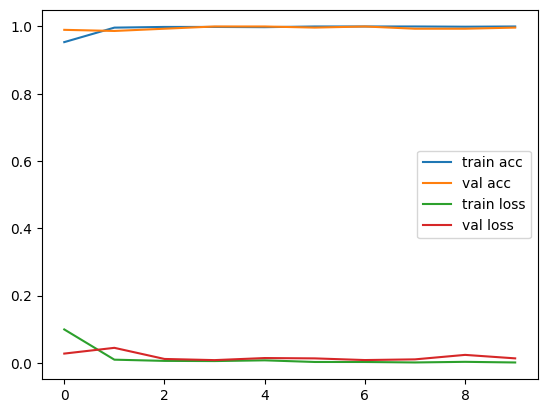

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()


In [ ]:
model.save('acne_classifier.keras')


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'dataset/dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 300 images belonging to 2 classes.


# Evaluación

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 458ms/step
              precision    recall  f1-score   support

       Clear       0.97      1.00      0.99       150
        Acne       1.00      0.97      0.99       150

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



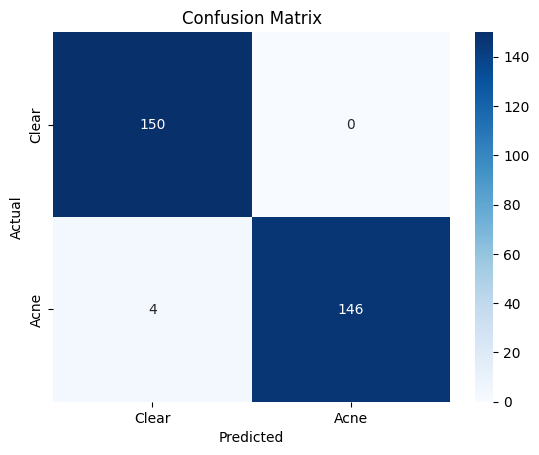

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions
preds = model.predict(test_generator)
pred_labels = (preds > 0.5).astype("int32").flatten()

# True labels
true_labels = test_generator.classes

# Classification report
print(classification_report(true_labels, pred_labels, target_names=["Clear", "Acne"]))

# Confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clear", "Acne"], yticklabels=["Clear", "Acne"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


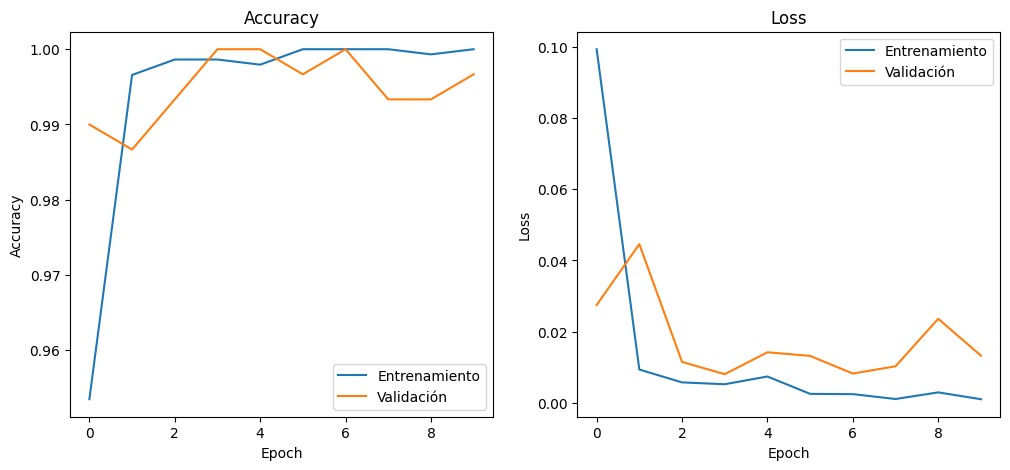

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(acc, label='Entrenamiento')
plt.plot(val_acc, label='Validación')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss, label='Entrenamiento')
plt.plot(val_loss, label='Validación')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Clasificador 2

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img("noacne.jpg", target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
print("Prediction:", "Acne" if prediction < 0.5 else "Sin acné")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Prediction: Sin acné


# Errores de clasificación del modelo

In [ ]:
y_true_all = []
y_pred_all = []
images_all = []

for i in range(len(val_gen)):
    imgs, labels = val_gen[i]
    preds = model.predict(imgs, verbose=0)

    # Detectar si labels es one-hot o binario
    if len(labels.shape) > 1 and labels.shape[1] > 1:
        y_true_batch = np.argmax(labels, axis=1)
    else:
        y_true_batch = labels.astype(int)

    y_pred_batch = np.argmax(preds, axis=1)

    y_true_all.extend(y_true_batch)
    y_pred_all.extend(y_pred_batch)
    images_all.extend(imgs)

y_true = np.array(y_true_all)
y_pred = np.array(y_pred_all)
images_all = np.array(images_all)

wrong_idx = np.where(y_true != y_pred)[0]

plt.figure(figsize=(12,12))
for i in range(min(9, len(wrong_idx))):
    idx = wrong_idx[i]
    img = images_all[idx]
    true_label = class_names[y_true[idx]]
    pred_label = class_names[y_pred[idx]]
    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.title(f'Real: {true_label}\\nPred: {pred_label}')
    plt.axis('off')
plt.suptitle('Errores de clasificación')
plt.show()